<a href="https://colab.research.google.com/github/Vaishu03/ML/blob/main/Mileage_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

## Import the dataset

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

## Data Preprocessing

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


## Removing missing values

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


## Data Visualization

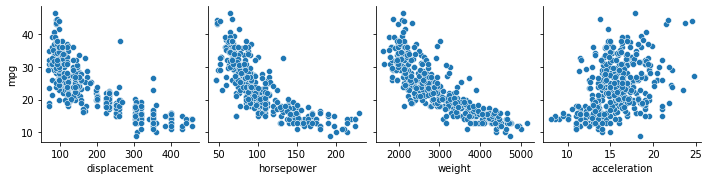

In [15]:
sns.pairplot(df,x_vars=['displacement','horsepower','weight','acceleration'],y_vars=['mpg'])

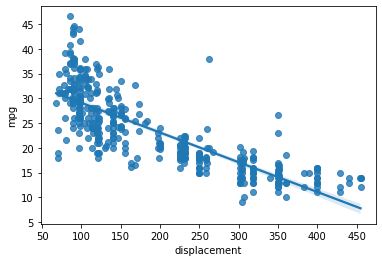

In [16]:
sns.regplot(data=df,x='displacement',y='mpg')

## Define X and y

In [17]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [18]:
y = df['mpg']

In [19]:
y.shape

(392,)

In [20]:
X = df[['displacement','horsepower','weight','acceleration']]

In [21]:
X.shape

(392, 4)

## Standardization

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [27]:
X = ss.fit_transform(X)

In [28]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [29]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-1.393443e-16,-3.293850e-16,5.607759e-17,1.608691e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


## Train Test Split

In [30]:
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [33]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

## Linear Regression model

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train,y_train)

LinearRegression()

In [37]:
model.intercept_

23.653188393016045

In [38]:
model.coef_

array([-0.36295131, -1.92934886, -4.67586185, -0.21821588])

## Predict Test Data

In [39]:
y_pred = model.predict(X_test)

In [40]:
y_pred

array([25.35440384, 27.34512818, 21.18569778, 32.94588545, 15.51015662,
       18.08141056, 17.12215404,  7.76078512, 29.74563903, 28.27050006,
       21.59336864, 22.15271372, 26.15697611, 26.65877065, 13.20963504,
       17.47998838, 24.48524656, 29.17153572, 10.80256245,  9.88472626,
       12.65208483, 31.19332437, 23.47947219, 15.42051559, 16.45165817,
        8.87759044, 19.14056505, 30.37877046, 22.45407491, 26.22296471,
       22.37463376, 22.83642777, 26.89105892, 24.45893721, 24.00976949,
       30.01209585, 31.84904458, 21.96087029, 16.77341942, 26.10550895,
       22.84675532, 24.15647962, 30.44818928, 23.29067437, 23.03790947,
       11.82950638, 15.19249644, 32.07013721, 22.92057517, 29.77519599,
       28.64519068, 11.17702692, 23.97148382, 13.93872682, 16.81442675,
       23.99724296, 24.06110714, 29.9270078 , 29.67800625, 26.09970411,
       31.00244082, 27.60656057, 20.49359844, 23.89023768, 26.10625597,
       32.42834427,  9.64530779, 25.59551837, 22.62282372, 14.52

## Model Accuracy

In [41]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [42]:
mean_absolute_error(y_test,y_pred)

3.1668606982091623

In [43]:
mean_absolute_percentage_error(y_test,y_pred)

0.15009409352467099

In [44]:
r2_score(y_test,y_pred)

0.6981442662708629

## Polynomial Regression

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)

In [47]:
X_train2 = poly.fit_transform(X_train)

In [48]:
X_test2 = poly.fit_transform(X_test)

In [49]:
model.fit(X_train2,y_train)

LinearRegression()

In [51]:
model.intercept_

21.468983653971737

In [52]:
model.coef_

array([-2.05660645, -4.42649815, -2.4111131 , -0.90848653,  1.24334798,
        1.29132664,  0.9004597 , -0.13327031, -0.95253164,  0.46490891])

In [54]:
y_pred_poly = model.predict(X_test2)

## Model Accuracy

In [59]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,r2_score

In [60]:
mean_absolute_error(y_test,y_pred_poly)

2.6082861141339535

In [61]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.12010662747662748

In [62]:
r2_score(y_test,y_pred_poly)

0.7644797922023335